<a href="https://colab.research.google.com/github/edgar-anco/TF_ANC_JUR_MON/blob/main/Codigo%20Fuente/TF_ANC_JUR_MON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd # Para la lectura de archivos CSV
url = 'https://raw.githubusercontent.com/edgar-anco/TF_ANC_JUR_MON/main/Dataset/distritos-peru.csv'
df = pd.read_csv(url)
# pd.set_option('display.max_rows',None) # Para visualizar todos los registros
df

,Departamento,Provincia,Distrito,Latitud,Longitud
0,CAJAMARCA,CONTUMAZA,GUZMANGO,-7.364304,-78.917689
1,CAJAMARCA,SAN PABLO,SAN LUIS,-7.159048,-78.873085
2,LAMBAYEQUE,CHICLAYO,LAGUNAS,-7.014425,-79.671301
3,LAMBAYEQUE,CHICLAYO,MONSEFU,-6.865730,-79.857485
4,LAMBAYEQUE,CHICLAYO,CAYALTI,-6.888701,-79.506682
...,...,...,...,...,...
1870,AMAZONAS,BONGARA,YAMBRASBAMBA,-5.524329,-77.860549
1871,AMAZONAS,UTCUBAMBA,YAMON,-6.011998,-78.523368
1872,AREQUIPA,CASTILLA,ANDAGUA,-15.485047,-72.376818
1873,AREQUIPA,CASTILLA,CHOCO,-15.414138,-72.068755


In [6]:
nomprovincias = df['Provincia'].unique() # Para obtener todas las provincias disponibles
print(nomprovincias)

['CONTUMAZA' 'SAN PABLO' 'CHICLAYO' 'BARRANCA' 'HUAURA' 'OYON'
 'ANTONIO RAYMONDI' 'HUAYLAS' 'BOLOGNESI' 'SANTA' 'CONDESUYOS' 'CASTILLA'
 'CAYLLOMA' 'ISLAY' 'LA UNION' 'AREQUIPA' 'CAMANA' 'CARAVELI' 'LA MAR'
 'HUANTA' 'TAYACAJA' 'ABANCAY' 'CHINCHEROS' 'ANDAHUAYLAS' 'MORROPON'
 'PAITA' 'AYABACA' 'TALARA' 'SULLANA' 'TACNA' 'HUANUCO' 'MARAÑON'
 'CUTERVO' 'TAHUAMANU' 'SAN ROMAN' 'EL COLLAO' 'CHUCUITO' 'PUNO' 'LAMPA'
 'AZANGARO' 'MELGAR' 'HUANCANE' 'CARABAYA' 'PALLASCA' 'POMABAMBA'
 'HUAMALIES' 'TARMA' 'CHANCHAMAYO' 'ASUNCION' 'CARLOS FERMIN FITZCARRALD'
 'OCROS' 'RECUAY' 'YUNGAY' 'MARISCAL LUZURIAGA' 'CARHUAZ' 'HUARI' 'SIHUAS'
 'CAJATAMBO' 'CELENDIN' 'CHOTA' 'SAN MIGUEL' 'SANTA CRUZ' 'SAN IGNACIO'
 'JAEN' 'TUMBES' 'CONTRALMIRANTE VILLAR' 'ZARUMILLA' 'LIMA' 'DOS DE MAYO'
 'LAURICOCHA' 'AMBO' 'PACHITEA' 'YAROWILCA' 'PUERTO INCA' 'HUACAYBAMBA'
 'UCAYALI' 'CHUMBIVILCAS' 'CANAS' 'ACOMAYO' 'PAUCAR DEL SARA SARA' 'SUCRE'
 'HUARAL' 'YAUYOS' 'CALLAO' 'CUSCO' 'CHINCHA' 'CORONGO' 'CAJAMARCA'
 'HUARME

In [30]:
#@title Selección de Provincia 
#@markdown Ingrese la provincia:

no_type_checking = ''
nom_prov = 'TACNA' #@param {type:"string"}
nomdistritos = provincias[nom_prov]['Distrito'].unique()
print('Hay', len(nomdistritos), 'distritos en la provincia de', nom_prov,'\n')
print('Los nombres de los distritos que se encuentran en la provincia de',nom_prov, 'son:')
print(nomdistritos)

Hay 11 distritos en la provincia de TACNA 

Los nombres de los distritos que se encuentran en la provincia de TACNA son:
['LA YARADA LOS PALOS' 'SAMA' 'ALTO DE LA ALIANZA' 'TACNA' 'CALANA'
 'PACHIA' 'PALCA' 'POCOLLAY' 'CIUDAD NUEVA' 'INCLAN'
 'CORONEL GREGORIO ALBARRACIN LANCHIPA']


In [18]:
# Para la generacion visual de grafos
import networkx as nx # Biblioteca de Python para grafos
import math
import numpy as np
import heapq as hq
import graphviz as gv

def nx2gv(G, weighted=False, params={'rankdir': 'LR', 'size': '6'},
          path=None, pathparams={'color':'orangered', 'penwidth': '3'},
          nodeinfo=False):
  if G.is_directed():
    g = gv.Digraph('G')
  else:
    g = gv.Graph('G')
  g.attr(**params)

  for u in G.nodes:
    if nodeinfo:
      g.node(str(u), **dict(G.nodes[u]))
    else:
      g.node(str(u))

  for u, v in G.edges():
    if G.is_directed():
      pp = pathparams if path and path[v] == u else {}
    else:
      pp = pathparams if (path and path[v] == u) or (path and path[u] == v) else {}

    if weighted:
      g.edge(str(u), str(v), f"{G.edges[u, v]['weight']}", **pp)
    else:
      g.edge(str(u), str(v), **pp)
      
  return g

def adjmatrix2gv(G, weighted=False, params={'rankdir': 'LR', 'size': '5'}):
  return nx2gv(nx.from_numpy_matrix(G), weighted, params)
             
def adjlist2gv(G, type='digraph', weighted=False, params={'rankdir': 'LR'}):
  digraph = type == 'digraph'
  if digraph:
    g = gv.Digraph('G')
  else:
    g = gv.Graph('G')
  gv.attr(**params)

  n = len(G)
  for i in range(n):
    g.node(str(i))
             
  for u in range(n):
    if weighted:
      for v, w in range(n):
        g.edge(str(u), str(v), str(w))
        if digraph:
          g.edge(str(v), str(u), str(w))
    else:
      for v in range(n):
        g.edge(str(u), str(v))
        if digraph:
          g.edge(str(v), str(u))

  return g
      
def path2gv(path, params={'rankdir': 'LR', 'size': '5'}):
  g = gv.Digraph('G')
  g.attr(**params)
              
  n = len(path)
  for i in range(n):
    g.node(str(i))

  for v, u in enumerate(path):
    if u != -1:
      g.edge(str(u), str(v))

  return g
              
def wedges2adjlist(filename: str, type='graph'):
  with open(filename) as file:
    data = []
    n = 0
    for line in file:
      if line[0] != '#':
        data.append([int(x) for x in line.strip().split(',')])
        if data[-1][0] > n: n = data[-1][0]
        if data[-1][1] > n: n = data[-1][1]

  n += 1
  G = [[] for _ in range(n)]
  for u, v, w in data:
    G[u].append((v, w))
    if type == 'graph':
      G[v].append((u, w))
              
  return G

In [19]:
# Calculo de distancia segun la latitud y longitud entre dos nodos con la formula de Haversine
def haversine(cp1, cp2):
  la1, lo1 = float(cp1['Latitud']), float(cp1['Longitud'])
  la2, lo2 = float(cp2['Latitud']), float(cp2['Longitud'])
  
  lo1, la1, lo2, la2 = map(math.radians, [lo1, la1, lo2, la2])
  dlo = lo2 - lo1
  dla = la2 - la1
  a = math.sin(dla/2)**2 + math.cos(la1) * math.cos(la2) * math.sin(dlo/2)**2
  c = 2 * math.asin(math.sqrt(a))
  r = 6371 # radio de la Tierra

  return round(c * r, 2)

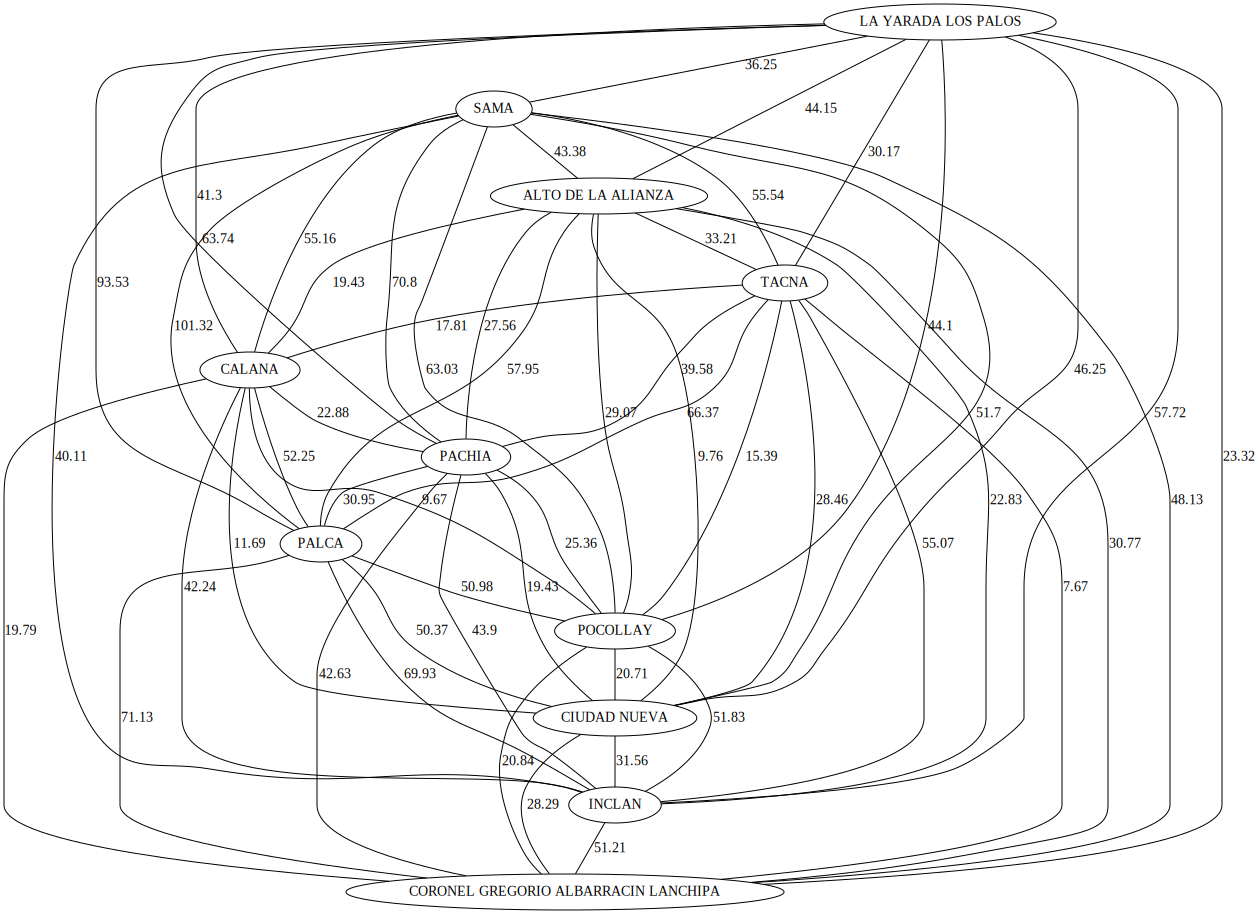

In [31]:
# Impresion del grafo de la provincia seleccionada
provincia = provincias[nom_prov] # nom_prov es elegido por el usuario
G = nx.Graph()
col = 'Distrito'
index = provincia.index[0]
for i, dis1 in provincia.iterrows():
    G.add_node(i-index, label=dis1[col])
for i, dis1 in provincia.iterrows():
    for j, dis2 in provincia.iterrows():
        if dis1[col] != dis2[col]:
            G.add_edge(i-index, j-index, weight=haversine(dis1, dis2))
nx2gv(G, nodeinfo = True, weighted=True, params={'size':'20'})